**Project# Healthcare-Insurance-Premium-Prediction**

In [100]:
# ===========================================================================
# 0. Import the Required Libraries
# ===========================================================================

import numpy as np                                                            # Numerical computing for array operations
import pandas as pd                                                           # Data manipulation and analysis library
import matplotlib.pyplot as plt                                               # Data visualization
import seaborn as sns                                                         # Statistical data visualization built on matplotlib

from sklearn.model_selection import train_test_split ,cross_val_score , KFold # Split arrays or matrices into random train and test subsets
from sklearn.preprocessing import LabelEncoder, StandardScaler                # Standardize features by removing the mean and scaling to unit variance
from sklearn.linear_model import LinearRegression                             # linear and ridge regression models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # tree-based ensemble model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # evaluation metrics for regression
from sklearn.compose import ColumnTransformer                                 # apply transformers to columns

import joblib                                                                 # save and load trained pipeline objects
import warnings                                                               # control warnings display
warnings.filterwarnings('ignore')                                             # ignore warnings to keep output clean

sns.set_theme(style="whitegrid")                                               # set seaborn theme for nicer plots
RANDOM_STATE = 42                                                             # seed for reproducibility
data_path = "/content/insurance.csv"                                          # default path to dataset (change if needed)

# Print to confirm imports
print("✅ Libraries imported")



✅ Libraries imported


In [101]:
# ======================================================================
# 1. # loading the data from csv file to a Pandas DataFrame
# ======================================================================

insurance_dataset = pd.read_csv('/content/insurance.csv')

# first 5 rows of the dataframe
print("Preview Of Top Data:",insurance_dataset.head())
# Last 5 rows of the dataset
print("\nPreview Of Bottom Data:",insurance_dataset.tail())



Preview Of Top Data:    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Preview Of Bottom Data:       age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603


In [102]:
# ======================================================================
# 2. # Quick Inspection
# ======================================================================

# Check the number of rows and  columns in the dataset
insurance_dataset.shape

(1338, 7)

In [103]:
# Information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# columns of the dataset
insurance_dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
# Statistical values of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [104]:
# Categorical features/columns of the dataset
insurance_dataset.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [13]:
print("Numeric summary stats:\n", insurance_dataset.describe().T)   # show numerical summary statistics transposed


Numeric summary stats:
            count          mean           std        min         25%       50%  \
age       1338.0     39.207025     14.049960    18.0000    27.00000    39.000   
bmi       1338.0     30.663397      6.098187    15.9600    26.29625    30.400   
children  1338.0      1.094918      1.205493     0.0000     0.00000     1.000   
charges   1338.0  13270.422265  12110.011237  1121.8739  4740.28715  9382.033   

                   75%          max  
age          51.000000     64.00000  
bmi          34.693750     53.13000  
children      2.000000      5.00000  
charges   16639.912515  63770.42801  


In [15]:
# Numerical columns of the dataset
insurance_dataset.describe().columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [17]:
# categorical columns of the dataset
insurance_dataset.describe(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [105]:
#======================================================================
# 3. Data Cleaning
#======================================================================
# Check for Missing values
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [21]:
# Check for Duplicate values in the dataset
insurance_dataset.duplicated().sum()

np.int64(0)

In [106]:
initial_len = len(insurance_dataset)                             # store initial number of rows
if insurance_dataset.duplicated().sum() > 0:                     # check if duplicates exist
    insurance_dataset.drop_duplicates(inplace=True)              # drop duplicates and reset index
    print("✅ Duplicates removed")
else:
    print("No duplicates found")

# basic data quality checks
print("Age range:", insurance_dataset['age'].min(), "to", insurance_dataset['age'].max())   # min and max age
print("BMI range:", insurance_dataset['bmi'].min(), "to", insurance_dataset['bmi'].max())   # min and max BMI
print("Children range:", insurance_dataset['children'].min(), "to", insurance_dataset['children'].max())  # child count range
print("Charges range:", insurance_dataset['charges'].min(), "to", insurance_dataset['charges'].max())   # min and max charges

✅ Duplicates removed
Age range: 18 to 64
BMI range: 15.96 to 53.13
Children range: 0 to 5
Charges range: 1121.8739 to 63770.42801


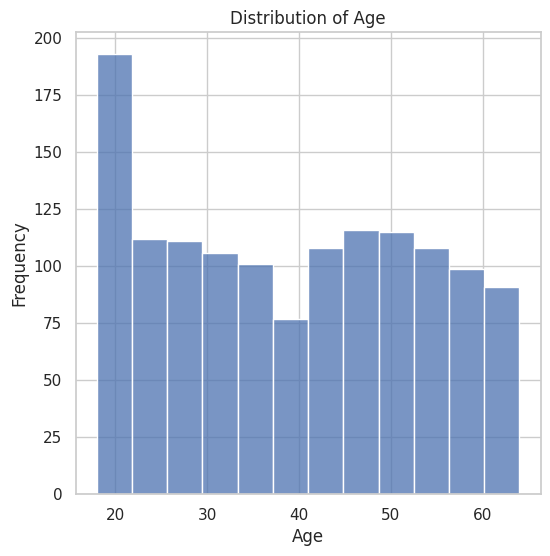

In [107]:
#============================================================
#4. EDA(Exploratory Data Analysis)
# 4.1 UNIVARIATE EDA (Distributions)
#============================================================
# Distribution of Age value
plt.figure(figsize=(6, 6))
sns.histplot(insurance_dataset['age'])
# sns.histplot(insurance_dataset['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

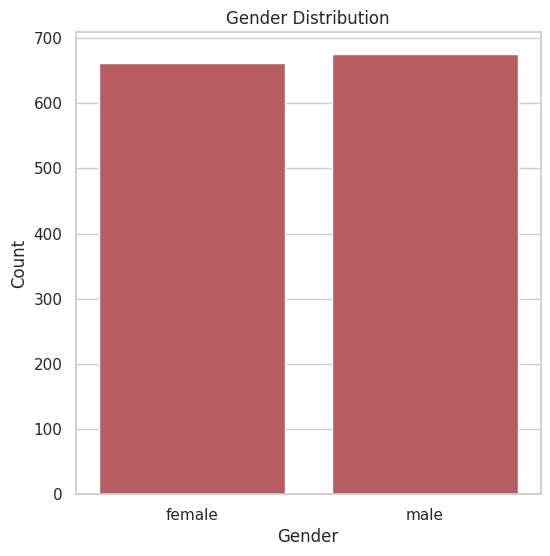

In [33]:
# Gender column
plt.figure(figsize=(6, 6))
sns.countplot(x = 'sex', data=insurance_dataset, color = 'r')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [108]:
# Check how many males and how many females in Gender column
insurance_dataset['sex'].value_counts()

,count
sex,
male,675
female,662


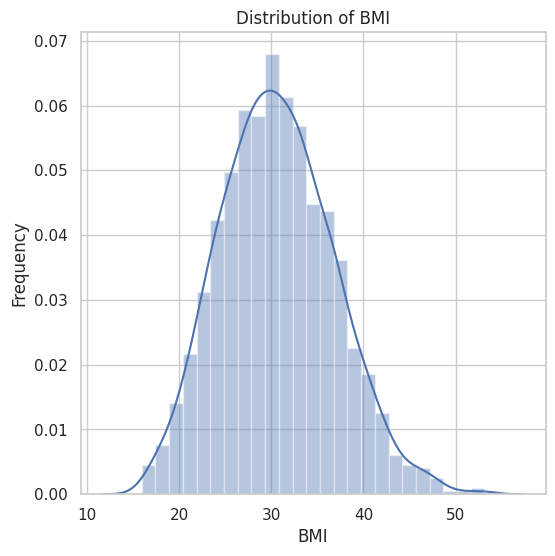

In [109]:
# BMI Distribution
plt.figure(figsize=(6, 6))
sns.distplot(insurance_dataset['bmi'])
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [36]:
#  BMI Range
print("BMI Range:", insurance_dataset['bmi'].min(), "to", insurance_dataset['bmi'].max())
# Normal BMI Range is 18.5 to 24.9


BMI Range: 15.96 to 53.13


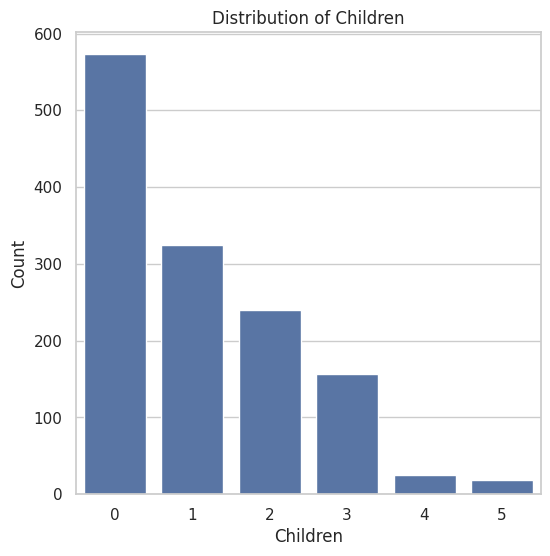

In [110]:
# Children Column Distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Distribution of Children')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()

In [111]:
# Children value count
insurance_dataset['children'].value_counts()

,count
children,
0,573
1,324
2,240
3,157
4,25
5,18


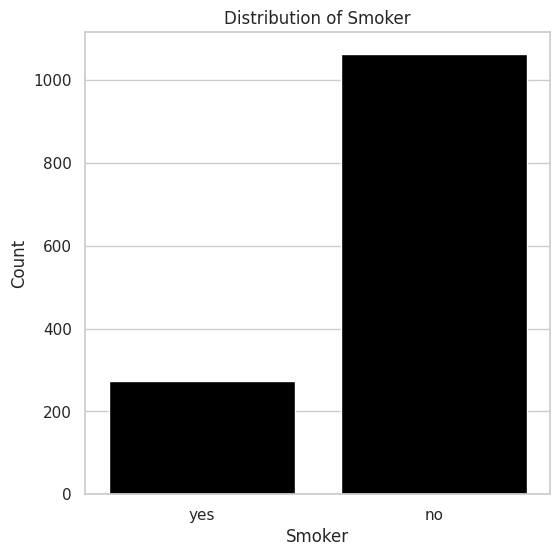

In [39]:
# Smoker Column
plt.figure(figsize=(6, 6))
sns.countplot(x='smoker', data=insurance_dataset, color = 'black')
plt.title('Distribution of Smoker')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

In [112]:
# Smoker Value count
insurance_dataset['smoker'].value_counts()

,count
smoker,
no,1063
yes,274


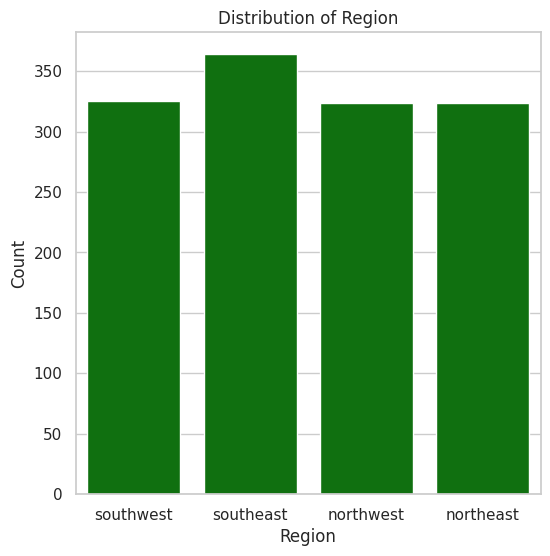

In [113]:
# Region Column
plt.figure(figsize=(6, 6))
sns.countplot(x='region', data=insurance_dataset, color = 'green')
plt.title('Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

In [42]:
# Region value counts
insurance_dataset['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


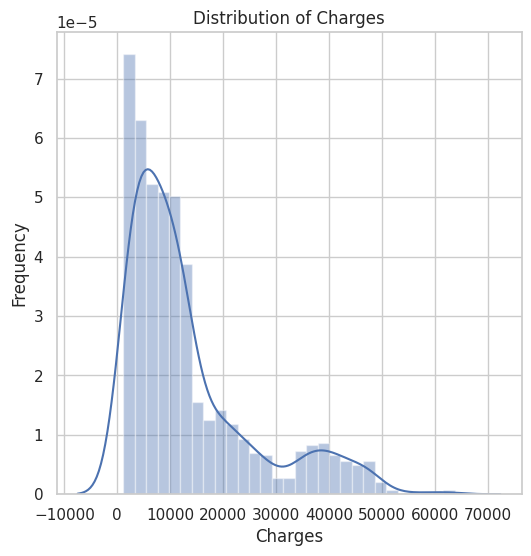

In [114]:
# Distribution of charges value
plt.figure(figsize=(6, 6))
sns.distplot(insurance_dataset['charges'])
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

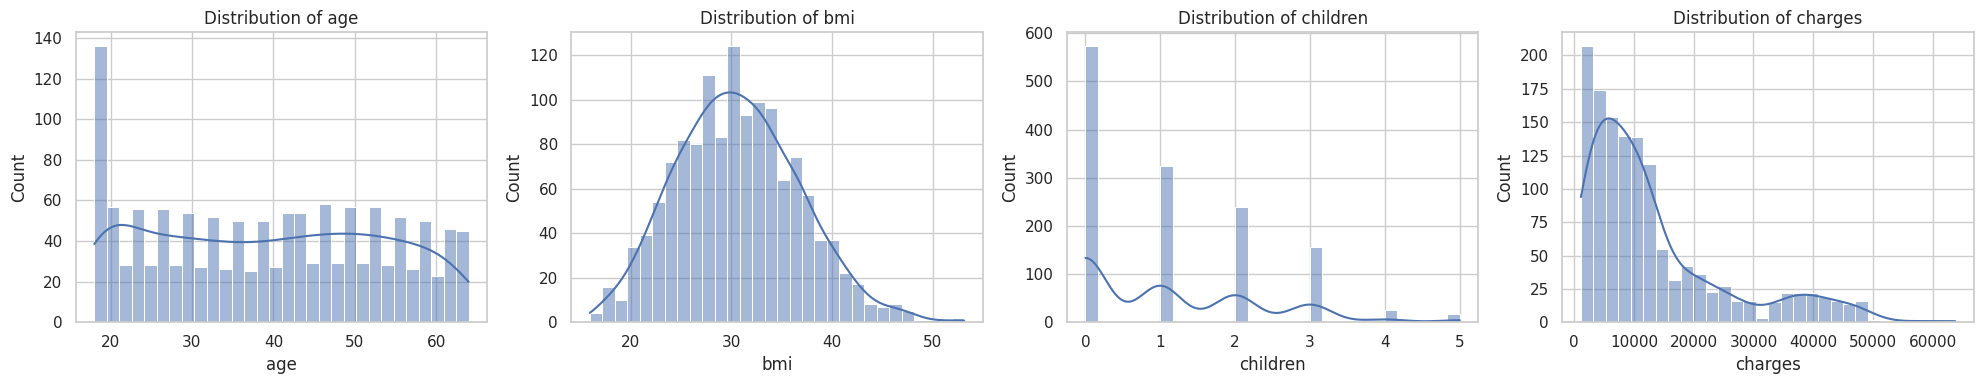

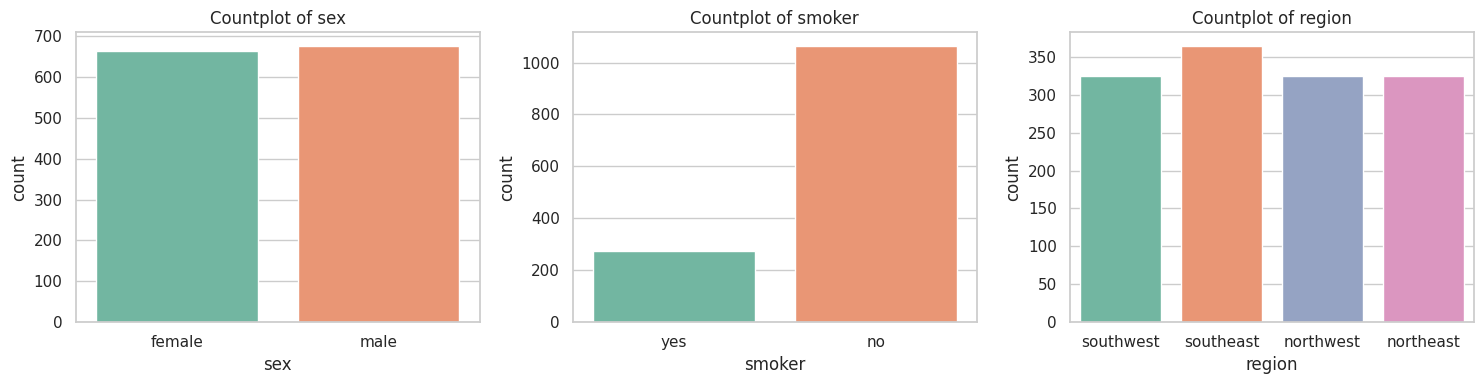

In [115]:
# Separate numeric and categorical columns
num_cols = insurance_dataset.select_dtypes(include=["int64", "float64"]).columns
cat_cols = insurance_dataset.select_dtypes(include=["object"]).columns

# ---------------- Numeric Columns (all in one row) ----------------
fig, axes = plt.subplots(1, len(num_cols), figsize=(5 * len(num_cols), 4))

for i, col in enumerate(num_cols):
    sns.histplot(insurance_dataset[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# ---------------- Categorical Columns (all in one row) ----------------
fig, axes = plt.subplots(1, len(cat_cols), figsize=(5 * len(cat_cols), 4))

for i, col in enumerate(cat_cols):
    sns.countplot(data=insurance_dataset, x=col, palette="Set2", ax=axes[i])
    axes[i].set_title(f"Countplot of {col}")

plt.tight_layout()
plt.show()


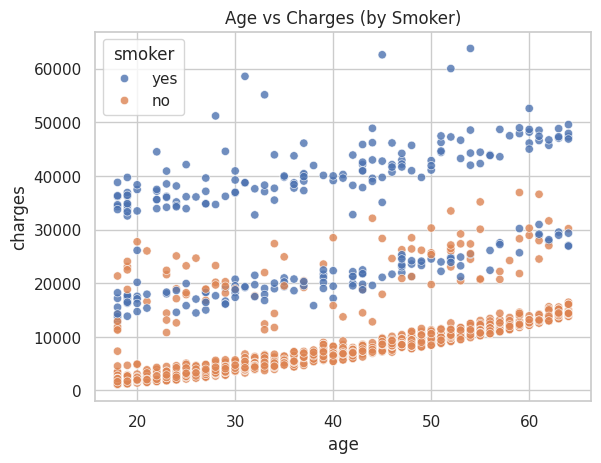

In [116]:
#==============================================================
# 4.2 BIVARIATE EDA(Bivariate Analysis)
#==============================================================
TARGET = "charges"                                          # define target variable name

# Scatter plot: Age vs Charges, color by smoker
sns.scatterplot(
    data=insurance_dataset,
    x="age",
    y="charges",
    hue="smoker",
    alpha=0.8
)
plt.title("Age vs Charges (by Smoker)")
plt.show()


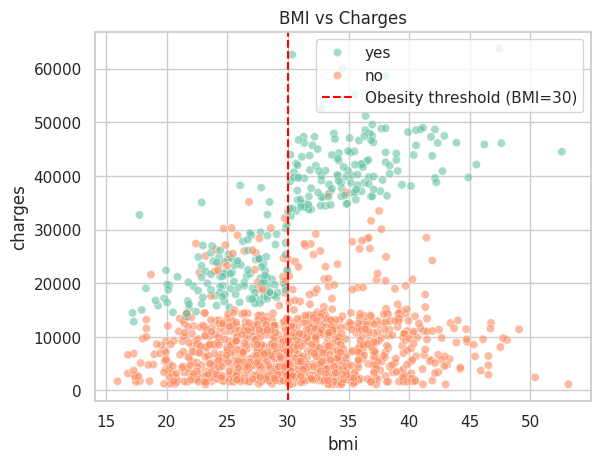

In [117]:
# scatter: bmi vs charges with obesity reference line
sns.scatterplot(data=insurance_dataset, x="bmi", y="charges", hue="smoker", alpha=0.6, palette="Set2")
plt.axvline(30, color='red', linestyle='--', label='Obesity threshold (BMI=30)')
plt.title("BMI vs Charges")
plt.legend()
plt.show()


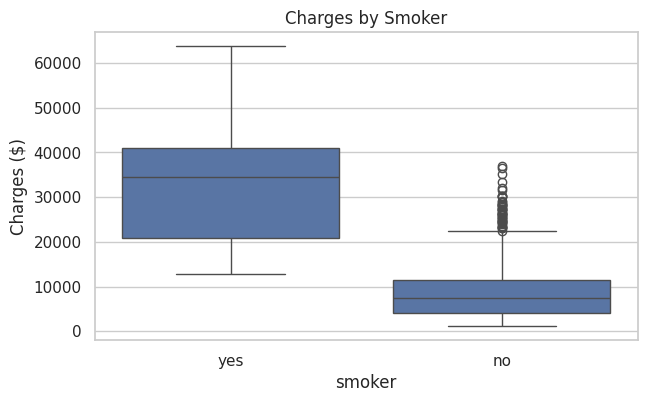

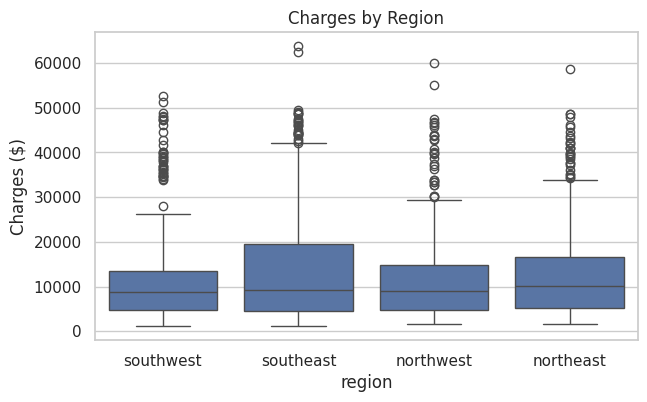

In [118]:
# categorical vs target: boxplots are useful to show distributions
for col in ["smoker", "region"]:
    if col in insurance_dataset.columns:
        plt.figure(figsize=(7, 4))                         # figure
        sns.boxplot(data=insurance_dataset, x=col, y=TARGET)              # boxplot per category
        plt.title(f"Charges by {col.title()}")             # title
        plt.xlabel(col)                                    # x label
        plt.ylabel("Charges ($)")                          # y label
        plt.show()                                         # render

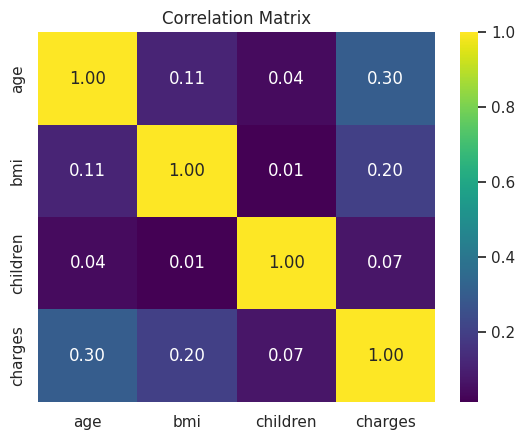

In [119]:
# ==================================================================
# 4.3. MULTIVARIATE EDA (correlation + pairplot)
# ==================================================================
# Correlation heatmap (numeric only)
sns.heatmap(insurance_dataset.corr(numeric_only=True), annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


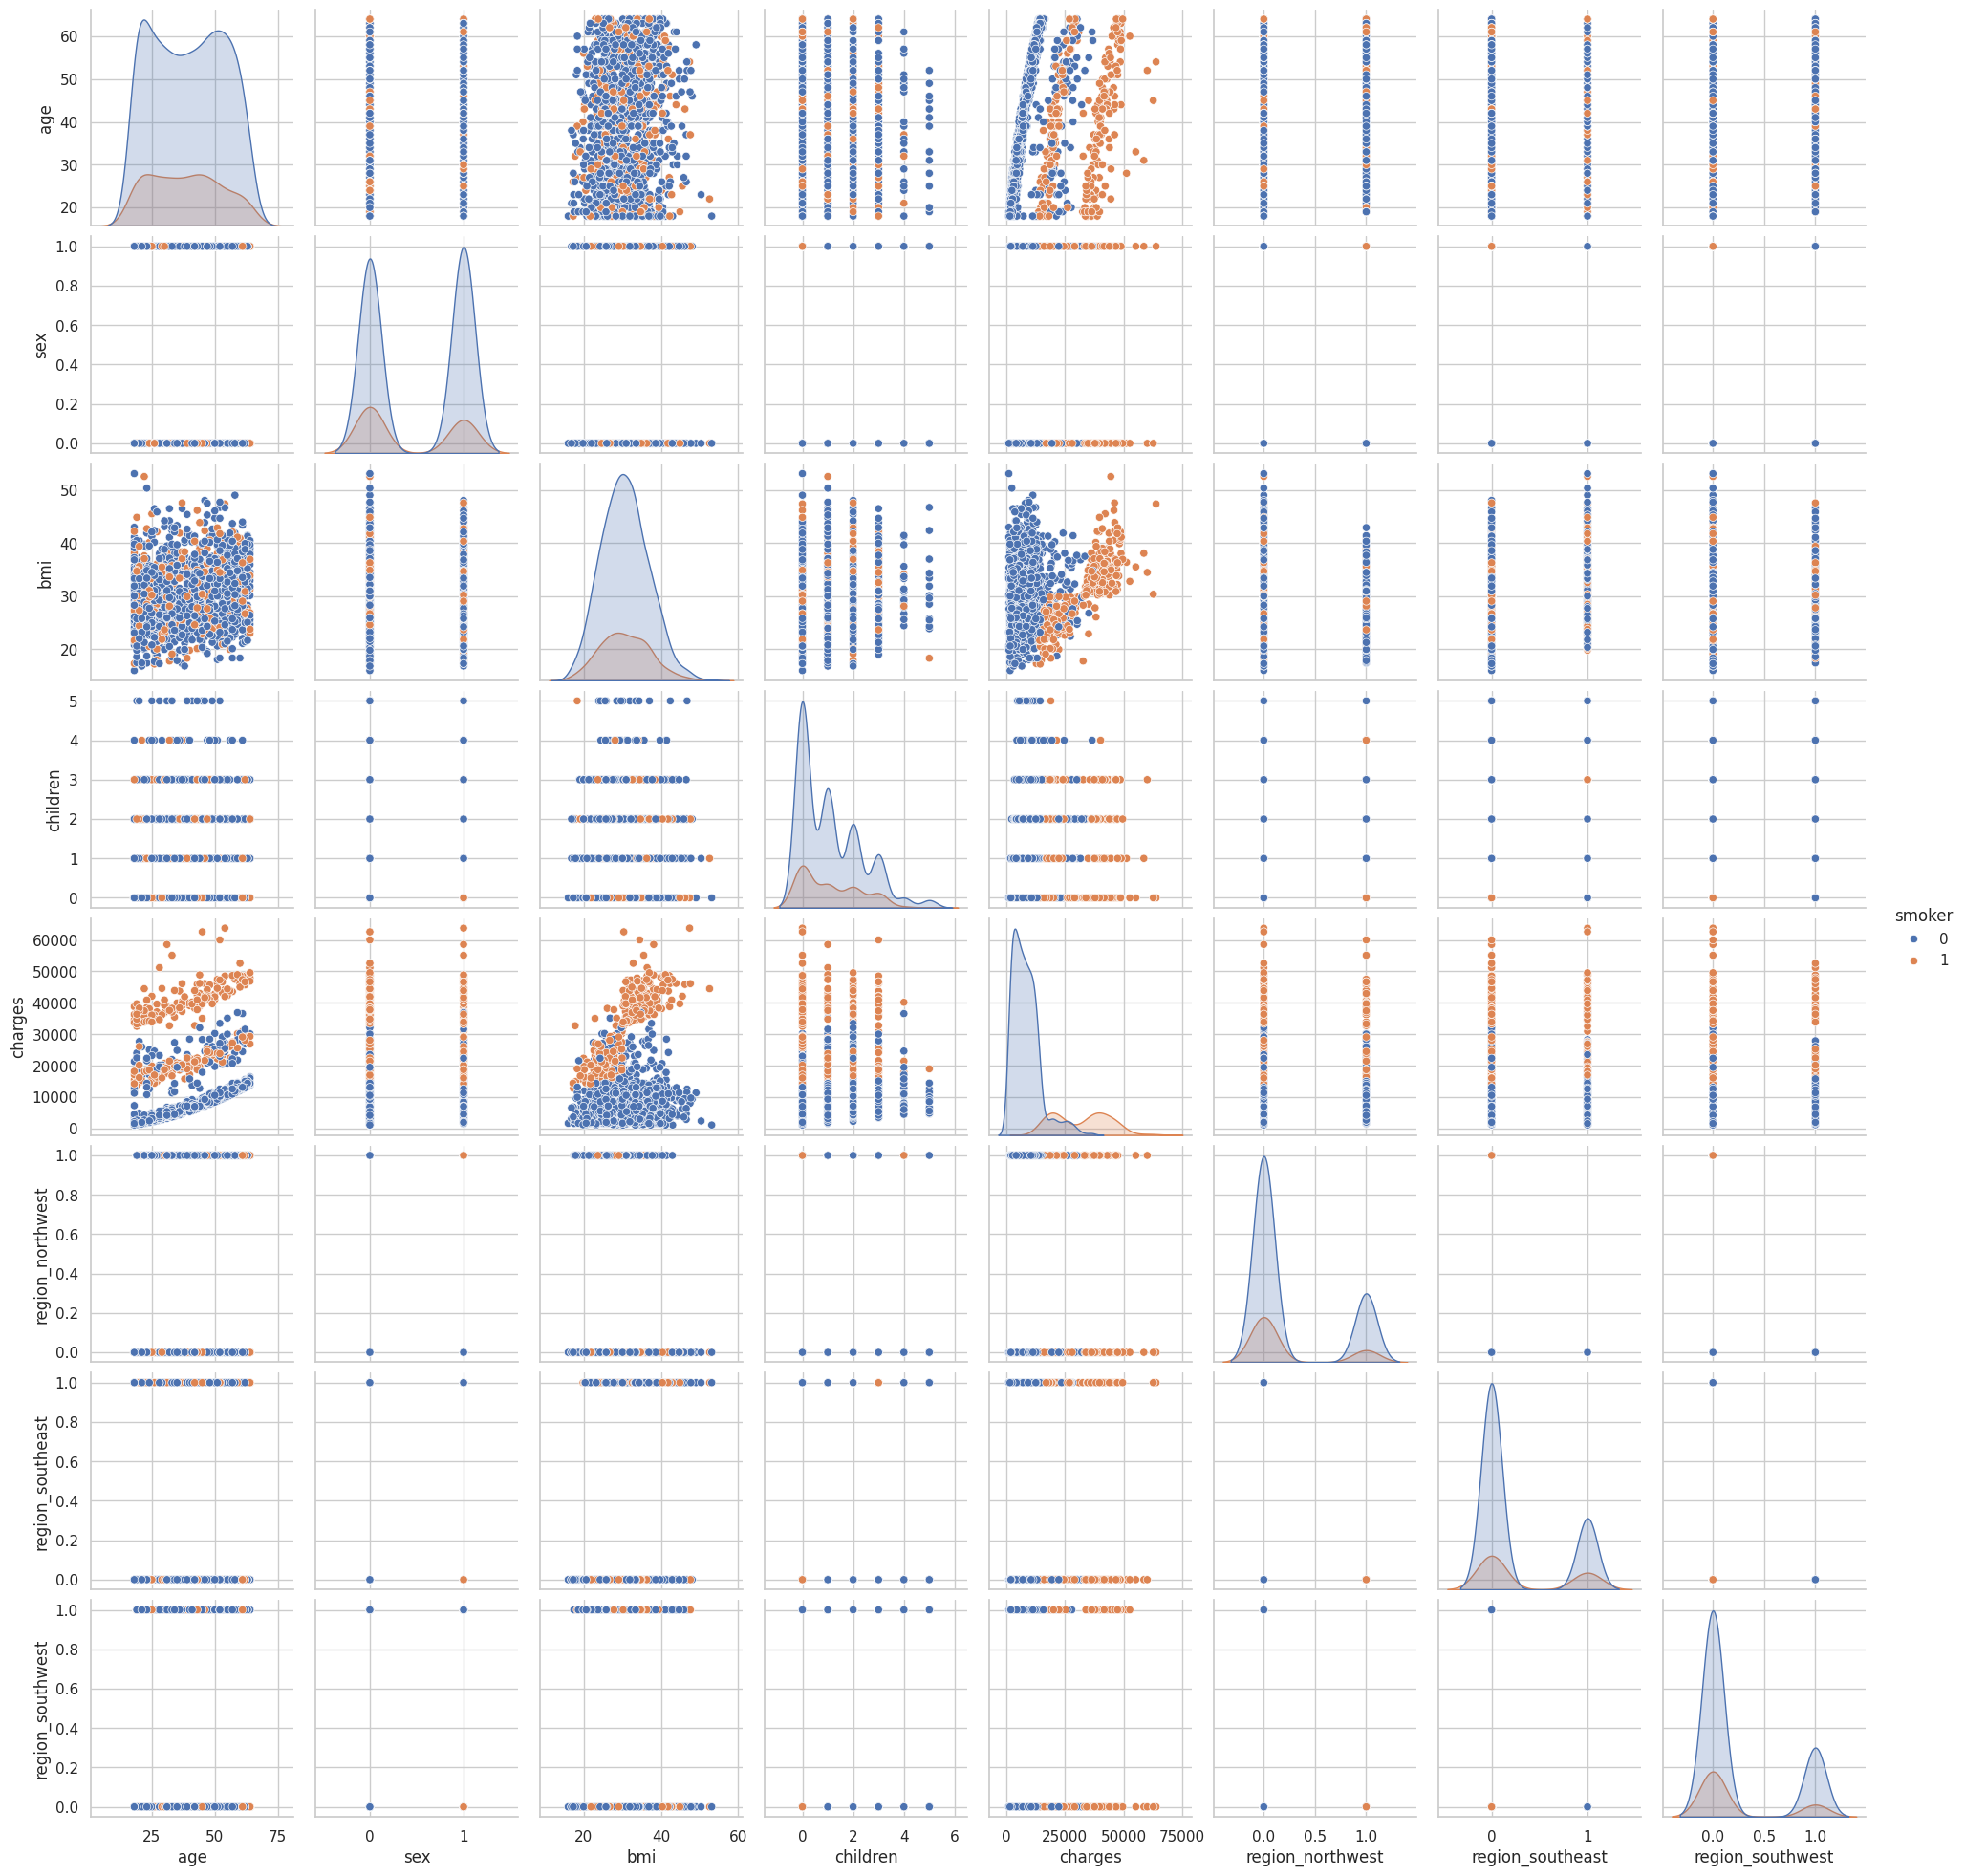

In [150]:
# pairplot for a few columns (sample if dataset is large)
sns.pairplot(insurance_dataset, diag_kind="kde", hue="smoker")
plt.show()


In [151]:

# ****************** Detect and handle outliers ***********************
Q1 = insurance_dataset[['bmi', 'charges']].quantile(0.25)
Q3 = insurance_dataset[['bmi', 'charges']].quantile(0.75)
IQR = Q3 - Q1
# Cap outliers or use robust scaling

In [120]:
#======================================================================
# 5. Feature Engineering
#======================================================================

In [121]:
# Encoding categorical features
# insurance_dataset.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
# insurance_dataset.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)
# insurance_dataset.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)

# Encode smoker and sex
insurance_dataset['smoker'] = insurance_dataset['smoker'].map({'yes':1, 'no':0})
insurance_dataset['sex'] = insurance_dataset['sex'].map({'male':0, 'female':1})

# One-hot encode region (safe for categorical)
insurance_dataset = pd.get_dummies(insurance_dataset, columns=['region'], drop_first=True)

# Split features and target
X = insurance_dataset.drop(columns='charges', axis=1)
y = insurance_dataset['charges']
print(f"\n📈 FEATURES (X): {X.shape}")
print(f"TARGET (y): {y.shape}")




📈 FEATURES (X): (1337, 8)
TARGET (y): (1337,)


**Splitting the data into Training data & Testing Data**

In [122]:
#==================================================================
#6.  **Splitting the Features and Target**
#==================================================================
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(f"\n📊 DATA SPLIT:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# print(X_train)
# print(X_test)
# print(y_train)
# print(y_test)

# **************************** Feature Scaling*********************************
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # Fit on train
X_test_scaled = scaler.transform(X_test)         # Transform test only



📊 DATA SPLIT:
Training set: 1069 samples
Testing set: 268 samples


In [123]:
#===================================================================
# 7. Model Selection & Evaluation
#===================================================================
# Linear Regression
# Decision Tree
# Random Forest
# Gradient Boosting
results = {}

# 1. Linear Regression (unscaled here, but better with scaled)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

results["LinearRegression"] = {
    "MAE": mean_absolute_error(y_test, y_pred_lin),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lin)),
    "R2": r2_score(y_test, y_pred_lin)
}

# 2. Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

results["DecisionTree"] = {
    "MAE": mean_absolute_error(y_test, y_pred_dt),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_dt)),
    "R2": r2_score(y_test, y_pred_dt)
}

# 3. Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

results["RandomForest"] = {
    "MAE": mean_absolute_error(y_test, y_pred_rf),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    "R2": r2_score(y_test, y_pred_rf)
}

# 4. Gradient Boosting
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

results["GradientBoosting"] = {
    "MAE": mean_absolute_error(y_test, y_pred_gb),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_gb)),
    "R2": r2_score(y_test, y_pred_gb)
}

# Convert to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

                          MAE         RMSE        R2
LinearRegression  4484.903636  6562.906309  0.714827
DecisionTree      3081.912014  6499.924398  0.720274
RandomForest      2695.161472  4993.024666  0.834939
GradientBoosting  2414.978470  4672.871856  0.855428


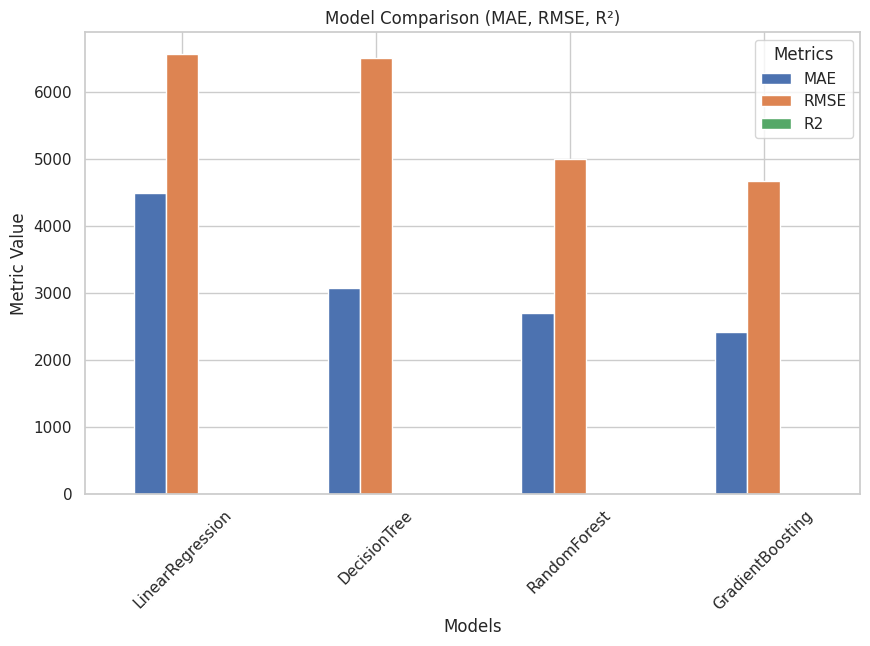

In [152]:
#=============================================================
#8.  Model Comparison
#=============================================================
results_df.plot(kind='bar', figsize=(10,6))
plt.title("Model Comparison (MAE, RMSE, R²)")
plt.xlabel("Models")
plt.ylabel("Metric Value")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.show()


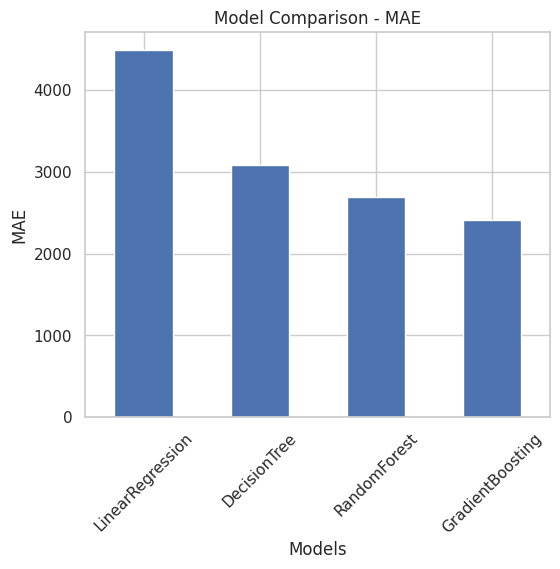

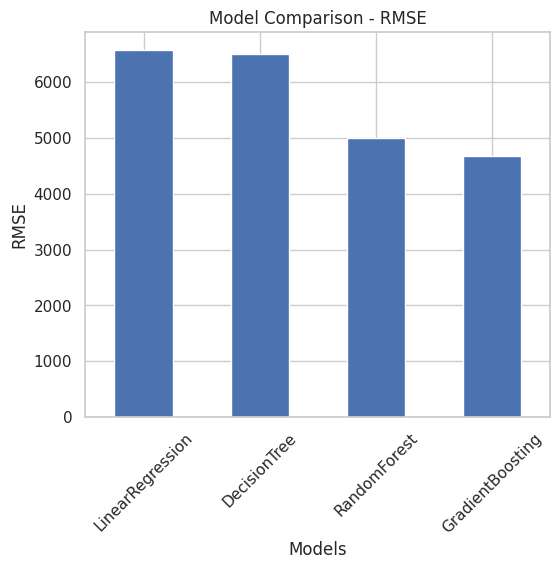

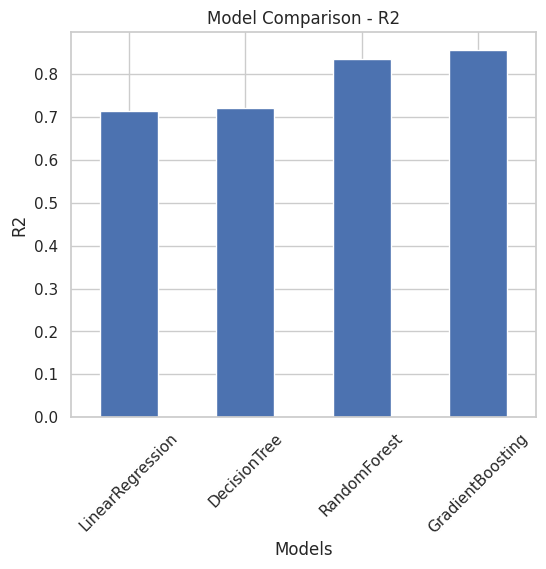

In [125]:
metrics = ['MAE', 'RMSE', 'R2']

for metric in metrics:
    results_df[metric].plot(kind='bar', figsize=(6,5), title=f'Model Comparison - {metric}')
    plt.xlabel("Models")
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.show()


In [132]:
#========================================================================
#9.  Testing Models with New Data (Predictions)
#========================================================================

import numpy as np
import pandas as pd

# Example raw new data
new_data = pd.DataFrame({
    'age': [29, 45],
    'bmi': [26.5, 32.1],
    'children': [2, 0],
    'sex': [1, 0],       # 0=male, 1=female
    'smoker': [0, 1],    # 0=no, 1=yes
    'region': ['southeast', 'northwest']  # raw region column
})

# 1️⃣ Encode region as dummies (drop_first=True like training)
new_data = pd.get_dummies(new_data, columns=['region'], drop_first=True)

# 2️⃣ Add missing columns to match X_train
for col in X_train.columns:
    if col not in new_data.columns:
        new_data[col] = 0

# 3️⃣ Reorder columns to match X_train
new_data = new_data[X_train.columns]

# 4️⃣ Scale features if StandardScaler was used
new_data_scaled = scaler.transform(new_data)  # use same scaler from training

# 5️⃣ Predict with all models
predictions = {}
predictions['LinearRegression'] = np.maximum(0, lin_reg.predict(new_data_scaled))  # clip negatives
predictions['DecisionTree'] = dt.predict(new_data)
predictions['RandomForest'] = rf.predict(new_data)
predictions['GradientBoosting'] = gb.predict(new_data)

# 6️⃣ Convert to DataFrame for readability
pred_df = pd.DataFrame(predictions, index=[f'Sample {i+1}' for i in range(new_data.shape[0])])
print(pred_df)


          LinearRegression  DecisionTree  RandomForest  GradientBoosting
Sample 1          0.000000   18157.87600   4815.781749       6373.065708
Sample 2      36348.924931   41097.16175  40625.340510      41231.629413


            Feature  Importance
4            smoker    0.630477
2               bmi    0.200123
0               age    0.130321
3          children    0.019066
6  region_southeast    0.005379
5  region_northwest    0.005289
1               sex    0.004789
7  region_southwest    0.004556


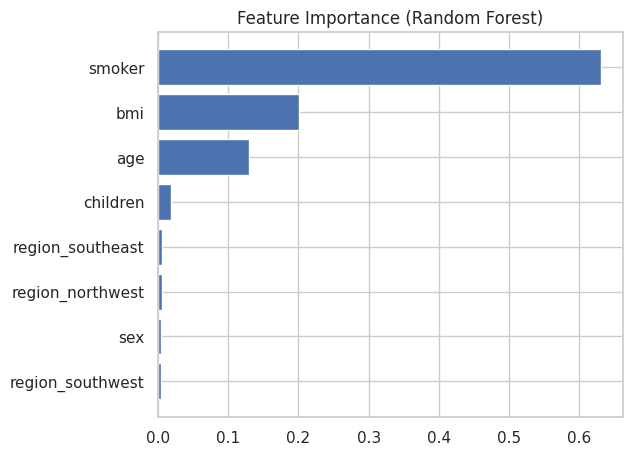

In [139]:
#==========================================================
#10. Feature Importance (Why model made decisions?)
#===========================================================
# Random Forest feature importance
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance_df)

plt.figure(figsize=(6,5))
plt.barh(feat_imp["Feature"], feat_imp["Importance"])
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


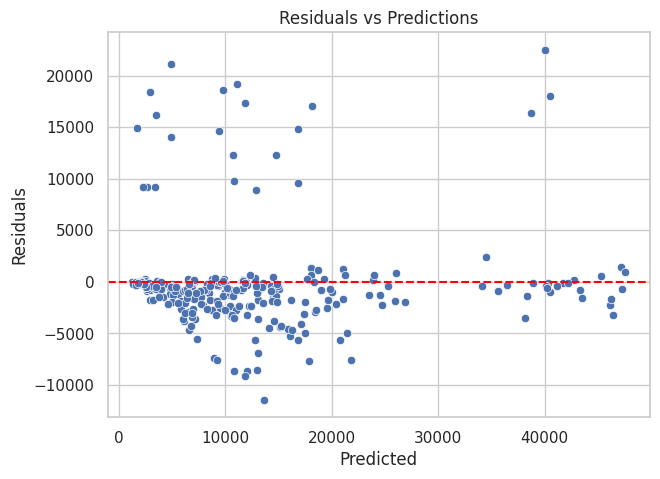

In [147]:

#=================================================================
#11. Residual Analysis( Errors Check)
#=================================================================
y_pred = rf.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Predictions")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()


In [148]:
#12.  Model Optimization / Hyperparameter Tuning

# Tune tree-based models to improve accuracy:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest
params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), params, cv=5, scoring='r2')
grid_rf.fit(X_train, y_train)
print(grid_rf.best_params_)


{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [144]:
# Save Models for Deployment
import joblib

joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')  # if used


['scaler.pkl']

In [145]:
# predict without retraining:
rf_loaded = joblib.load('random_forest_model.pkl')
scaler_loaded = joblib.load('scaler.pkl')


In [149]:
#=================================================================
#13. Final Conclusions
#=================================================================

print("\n📝 Key Conclusions:")
print("1. Based on R² scores, the best performing models are likely Random Forest or Gradient Boosting.")
print("2. Linear Regression may produce unrealistic negative predictions for new samples; tree-based models are safer.")
print("3. Feature importance indicates that 'smoker', 'bmi', and 'age' are the most influential factors affecting charges.")
print("4. The model pipeline is ready for new data: preprocessing, encoding, scaling, and prediction steps are all automated.")
print("5. For deployment, save the trained model and scaler to predict charges on any future insurance applicants.")


📝 Key Conclusions:
1. Based on R² scores, the best performing models are likely Random Forest or Gradient Boosting.
2. Linear Regression may produce unrealistic negative predictions for new samples; tree-based models are safer.
3. Feature importance indicates that 'smoker', 'bmi', and 'age' are the most influential factors affecting charges.
4. The model pipeline is ready for new data: preprocessing, encoding, scaling, and prediction steps are all automated.
5. For deployment, save the trained model and scaler to predict charges on any future insurance applicants.
